In [1]:
import tensorflow as tf
print(tf.version)

E:\Softwares\Anaconda\envs\nlp\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
E:\Softwares\Anaconda\envs\nlp\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
E:\Softwares\Anaconda\envs\nlp\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


<module 'tensorflow._api.v2.version' from 'C:\\Users\\sayan\\AppData\\Roaming\\Python\\Python37\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [3]:
import numpy as np

In [4]:
# Generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
mean = [0,3],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
mean = [3, 0],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)

In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [6]:
targets = np.vstack((np.zeros(shape=(num_samples_per_class, 1), dtype="float32"),
                    np.ones(shape=(num_samples_per_class, 1), dtype="float32")))

In [7]:
inputs[0]

array([0.2448823, 3.6491835], dtype=float32)

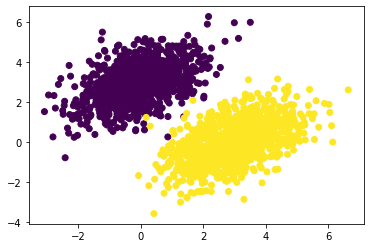

In [10]:
# Plotting the two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [31]:
# Creating Linear Classifier Variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [32]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [33]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [34]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [35]:
for step in range(60):
    loss = training_step(inputs, targets)
    print(f"Loss at {step + 1}: {loss:.4f}")

Loss at 1: 4.1018
Loss at 2: 0.4174
Loss at 3: 0.1663
Loss at 4: 0.1315
Loss at 5: 0.1199
Loss at 6: 0.1114
Loss at 7: 0.1038
Loss at 8: 0.0970
Loss at 9: 0.0908
Loss at 10: 0.0851
Loss at 11: 0.0799
Loss at 12: 0.0752
Loss at 13: 0.0709
Loss at 14: 0.0669
Loss at 15: 0.0634
Loss at 16: 0.0601
Loss at 17: 0.0571
Loss at 18: 0.0544
Loss at 19: 0.0519
Loss at 20: 0.0497
Loss at 21: 0.0476
Loss at 22: 0.0457
Loss at 23: 0.0440
Loss at 24: 0.0425
Loss at 25: 0.0410
Loss at 26: 0.0397
Loss at 27: 0.0385
Loss at 28: 0.0375
Loss at 29: 0.0365
Loss at 30: 0.0356
Loss at 31: 0.0348
Loss at 32: 0.0340
Loss at 33: 0.0333
Loss at 34: 0.0327
Loss at 35: 0.0322
Loss at 36: 0.0316
Loss at 37: 0.0312
Loss at 38: 0.0307
Loss at 39: 0.0304
Loss at 40: 0.0300
Loss at 41: 0.0297
Loss at 42: 0.0294
Loss at 43: 0.0291
Loss at 44: 0.0289
Loss at 45: 0.0286
Loss at 46: 0.0284
Loss at 47: 0.0282
Loss at 48: 0.0281
Loss at 49: 0.0279
Loss at 50: 0.0278
Loss at 51: 0.0277
Loss at 52: 0.0275
Loss at 53: 0.0274
Lo

In [36]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.16064042],
       [-0.13750084]], dtype=float32)>